In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda:2')

In [2]:
import numpy as np

In [3]:
from utils.data_utils import load_simulation_data

In [4]:
Xtr,Xte,ytr,yte,Ztr,Zte = load_simulation_data(simulation_params = {'p':100,'q':40, 'r':20, 'b':-10, 't':0}, 
                                               n1=1000, n2=400, svm=False, random_state=55, intercept=False, 
                                               train_frac = 0.7)

In [5]:
from utils.data_utils import dataset_description, input_uniqueness, initial_dataloaders
from utils.data_utils import load_data_with_name

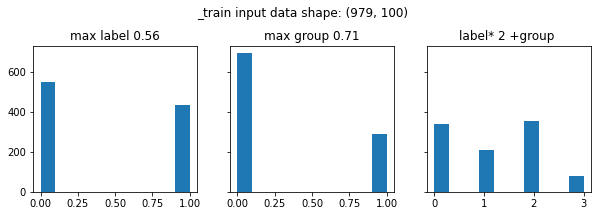

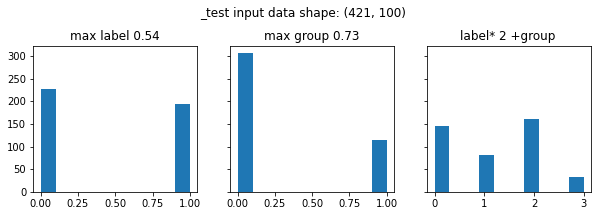

In [6]:
dataset_description(Xtr,ytr,Ztr, dataname='_train')
dataset_description(Xte,yte,Zte, dataname='_test')

In [7]:
input_uniqueness(Xtr,Xte)

1400 1400
satisfy uniqueness


In [8]:
from utils.data_utils import NPsDataSet
from torch.utils.data import DataLoader

batch_size = 64

train_data = NPsDataSet(Xtr, ytr, Ztr)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=False)

test_data = NPsDataSet(Xte, yte, Zte)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=False)

# Train model

In [9]:
from utils.train_utils import train_AL, train_AL_valid,train_AL_valid_trgrad

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from utils.binary_utils import construct_model_binary

model_arg={'n_hidden':32,'p_dropout':0.0}

clf = construct_model_binary('NN',Xte.shape[1],**model_arg)
criterion = nn.BCELoss()
optimizer = optim.Adam(clf.parameters())


In [11]:
from utils.train_utils import train_model

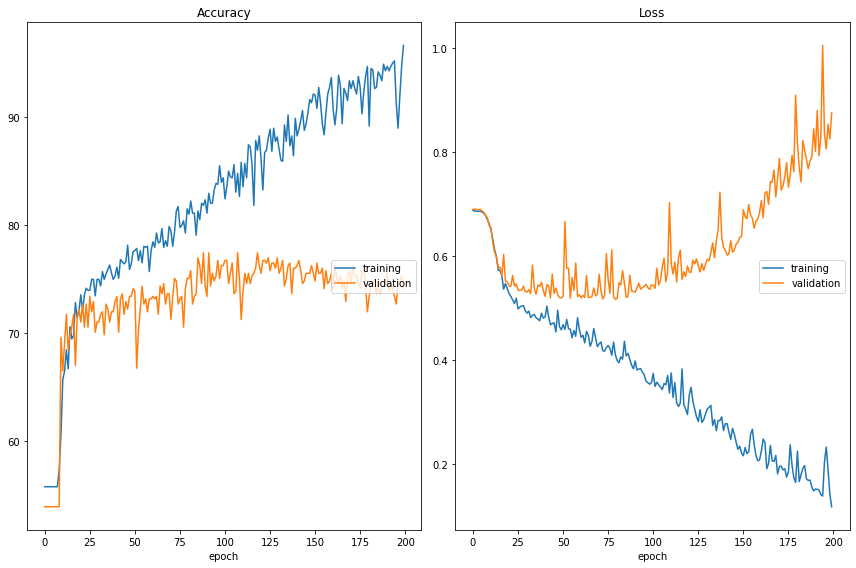

Accuracy
	training         	 (min:   55.771, max:   96.629, cur:   96.629)
	validation       	 (min:   53.919, max:   77.435, cur:   74.109)
Loss
	training         	 (min:    0.119, max:    0.688, cur:    0.119)
	validation       	 (min:    0.517, max:    1.005, cur:    0.875)
Finished Training


In [12]:
clf.to(device).train()
best_clf = train_model(clf, train_loader, criterion, optimizer, device, epochs=200, 
                test_loader = test_loader, val_loader = None, liveloss = None, problem_type = 'binary')

In [26]:
from utils.test_utils import test_groupwise, test_model
clf.eval()
loss,acc = test_model(clf, train_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(clf, test_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

best_clf.eval()
loss,acc = test_model(best_clf, train_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(best_clf, test_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.2023) tensor(93.1563)
0.0 : loss 0.17553076148033142 / acc 94.94949340820312
1.0 : loss 0.26713621616363525 / acc 88.81118774414062
1.0
tensor(0.6077) tensor(76.0095)
0.0 : loss 0.5151978135108948 / acc 79.80455780029297
1.0 : loss 0.8569042086601257 / acc 65.78947448730469
1.0
tensor(0.2158) tensor(91.5220)
0.0 : loss 0.1887834519147873 / acc 93.36219024658203
1.0 : loss 0.2813798189163208 / acc 87.06293487548828
1.0
tensor(0.5995) tensor(77.4347)
0.0 : loss 0.5063692331314087 / acc 81.4332275390625
1.0 : loss 0.8503375053405762 / acc 66.66666412353516
1.0


In [20]:
from utils.test_utils import test_groupwise, test_model
clf.eval()
loss,acc = test_model(clf, train_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(clf, test_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

best_clf.eval()
loss,acc = test_model(best_clf, train_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(best_clf, test_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.2642) tensor(87.9469)
0.0 : loss 0.2715817391872406 / acc 87.15728759765625
1.0 : loss 0.2462606579065323 / acc 89.86013793945312
0.0
tensor(0.8180) tensor(74.3468)
0.0 : loss 0.8202266693115234 / acc 75.57003021240234
1.0 : loss 0.8118579983711243 / acc 71.0526351928711
1.0
tensor(0.2599) tensor(88.9683)
0.0 : loss 0.20275048911571503 / acc 92.64069366455078
1.0 : loss 0.39842283725738525 / acc 80.06993103027344
1.0
tensor(0.6137) tensor(77.6722)
0.0 : loss 0.519321858882904 / acc 81.10749053955078
1.0 : loss 0.8677809834480286 / acc 68.42105102539062
1.0


In [13]:
from utils.test_utils import test_groupwise, test_model
clf.eval()
loss,acc = test_model(clf, train_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(clf, test_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.2771) tensor(89.1726)
0.0 : loss 0.27006664872169495 / acc 88.45598602294922
1.0 : loss 0.29429253935813904 / acc 90.90908813476562
0.0
tensor(0.6416) tensor(70.3088)
0.0 : loss 0.6484975814819336 / acc 69.70684051513672
1.0 : loss 0.6231781244277954 / acc 71.92982482910156
0.0


/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [14]:
best_clf.eval()
loss,acc = test_model(best_clf, train_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(best_clf, test_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.3242) tensor(86.6190)
0.0 : loss 0.294816792011261 / acc 87.5901870727539
1.0 : loss 0.3954256772994995 / acc 84.26573181152344
1.0
tensor(0.5694) tensor(75.5344)
0.0 : loss 0.5523828864097595 / acc 76.22149658203125
1.0 : loss 0.6153870224952698 / acc 73.68421173095703
1.0


In [32]:
from utils.test_utils import test_groupwise, test_model
clf.eval()
loss,acc = test_model(clf, train_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(clf, test_loader, criterion, device, 'binary')
print(loss,acc)
gid, worst_loader = test_groupwise(clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.3404) tensor(84.6782)
0.0 : loss 0.3121945858001709 / acc 87.15728759765625
1.0 : loss 0.4086076617240906 / acc 78.67132568359375
1.0
tensor(0.5842) tensor(72.4466)
0.0 : loss 0.5422253012657166 / acc 73.94136810302734
1.0 : loss 0.6972541213035583 / acc 68.42105102539062
1.0


In [33]:
best_clf.eval()
loss,acc = test_model(best_clf, train_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = train_loader)
print(gid)
loss,acc = test_model(best_clf, test_loader, criterion, device, 'binary')
print(loss, acc)
gid, worst_loader = test_groupwise(best_clf, train_loader, criterion, device, 
                                      'acc', 'binary', return_loader = True, test_loader = test_loader)
print(gid)

tensor(0.3404) tensor(84.6782)
0.0 : loss 0.3121945858001709 / acc 87.15728759765625
1.0 : loss 0.4086076617240906 / acc 78.67132568359375
1.0
tensor(0.5842) tensor(72.4466)
0.0 : loss 0.5422253012657166 / acc 73.94136810302734
1.0 : loss 0.6972541213035583 / acc 68.42105102539062
1.0
